In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [27]:
# Load dataset
df = pd.read_csv("D:/My Data ALL/Downloads/archive (6).zip")


In [28]:
# Tampilkan beberapa baris pertama
print(df.head())

   Mean_Integrated        EK  Skewness  Mean_DMSNR_Curve  SD_DMSNR_Curve  \
0       140.562500  1.502969 -0.699648          3.199833       19.110426   
1       102.507812  0.788423 -0.515088          1.677258       14.860146   
2       103.015625  0.323558  1.051164          3.121237       21.744669   
3       136.750000  0.958983 -0.636238          3.642977       20.959280   
4        88.726562  1.232198  1.123492          1.178930       11.468720   

   EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0        7.975532             74.242225      0  
1       10.576487            127.393580      0  
2        7.735822             63.171909      0  
3        6.896499             53.593661      0  
4       14.269573            252.567306      0  


In [29]:
# Cek missing values
print(df.isnull().sum())


Mean_Integrated         0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64


In [23]:
# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)


In [30]:
# Definisikan fitur dan target
X = df.drop("Class", axis=1)
y = df["Class"]


In [31]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)


In [33]:
# Melatih model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [34]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)


In [35]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9753168779186124
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2929
           1       0.46      0.42      0.44        69

    accuracy                           0.98      2998
   macro avg       0.72      0.70      0.71      2998
weighted avg       0.97      0.98      0.97      2998

Confusion Matrix:
[[2895   34]
 [  40   29]]


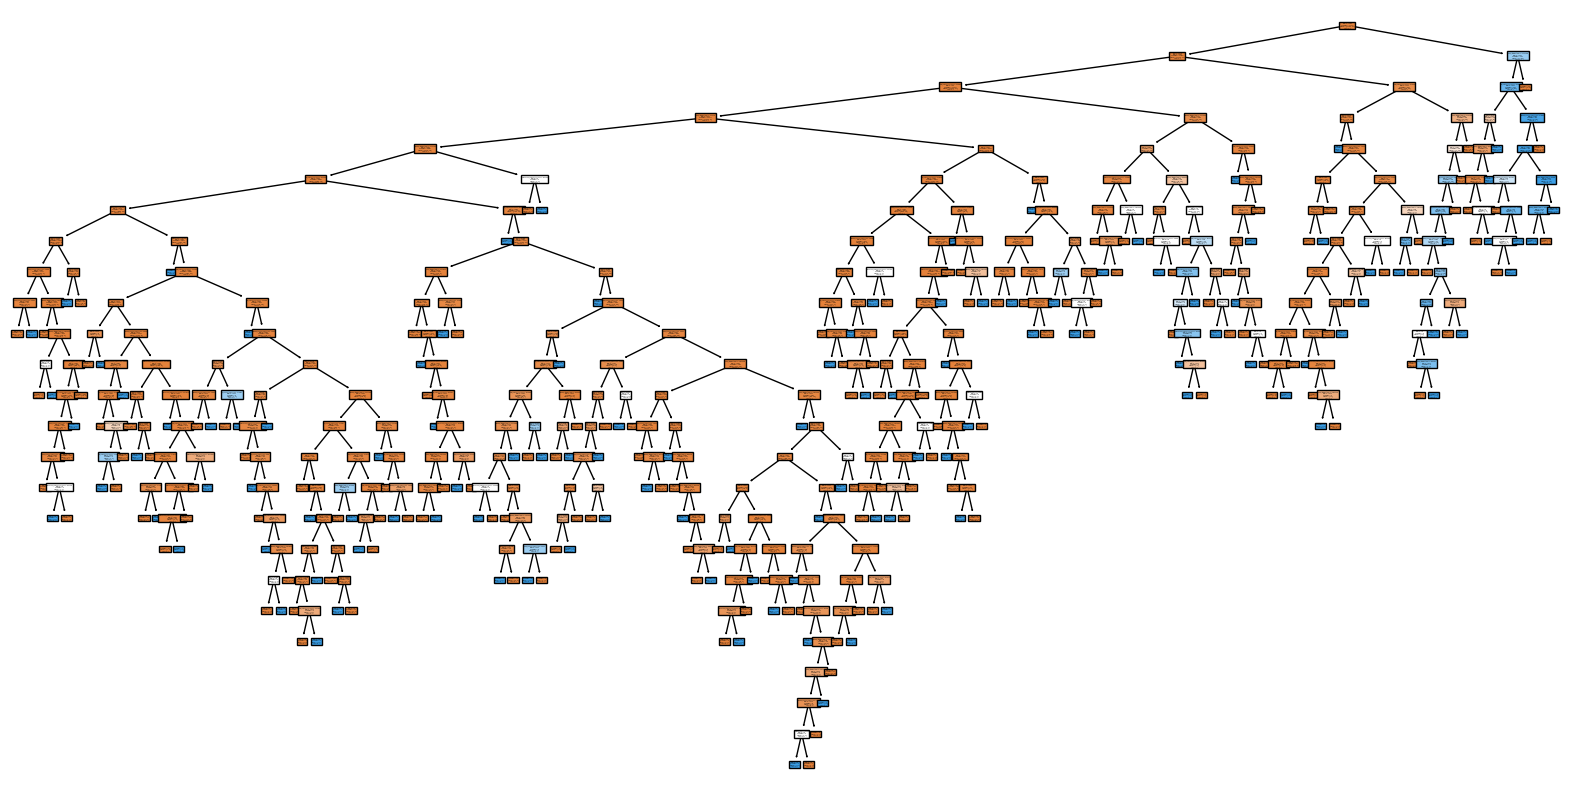

In [36]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()